<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/CAPSTONE_Data_Visualization_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization Lab

#Objectives

Visualize the distribution of data.

Visualize the relationship between two features.

Visualize composition of data.

Visualize comparison of data.

In [32]:
# Download the file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-10 00:36:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  37.9MB/s    in 0.9s    

2024-04-10 00:36:15 (37.9 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [33]:
# Connect to the database.

import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [34]:
# Import pandas module.

import pandas as pd

#Visualizing composition of data
Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.



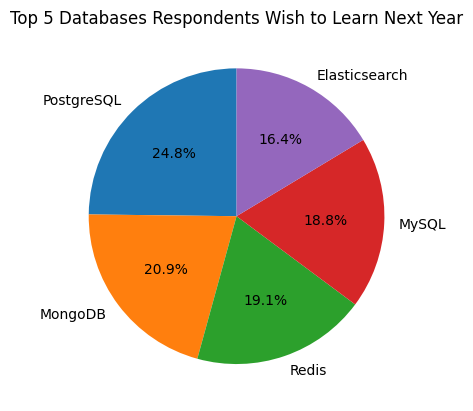

In [35]:
# Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names.
# Display percentages of each database on the pie chart

import pandas as pd
import matplotlib.pyplot as plt

# Read data from the table
df = pd.read_sql_query("SELECT DatabaseDesireNextYear, COUNT(*) AS Total FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5", conn)

# Prepare data for the pie chart
labels = df['DatabaseDesireNextYear'].to_list()
sizes = df['Total'].to_list()

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title and show the pie chart
ax.set_title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()


#Stacked Charts
Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35



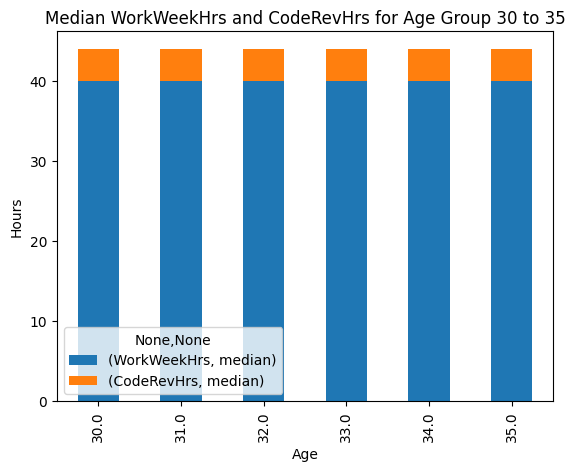

In [49]:
# Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35

import pandas as pd
import matplotlib.pyplot as plt
# Read data from the table
df1 = pd.read_sql_query("SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE Age BETWEEN 30 AND 35", conn)

# Group data by age
df2 = df1.groupby('Age').agg(['median'])

# Create a stacked chart
df2.plot.bar(stacked=True)

# Add title and labels
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')

# Show the chart
plt.show()


In [36]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [37]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [38]:
# Groupby Query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [39]:
# decsribe a table

table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

#Visualizing distribution of data
Histograms

Plot a histogram of ConvertedComp.

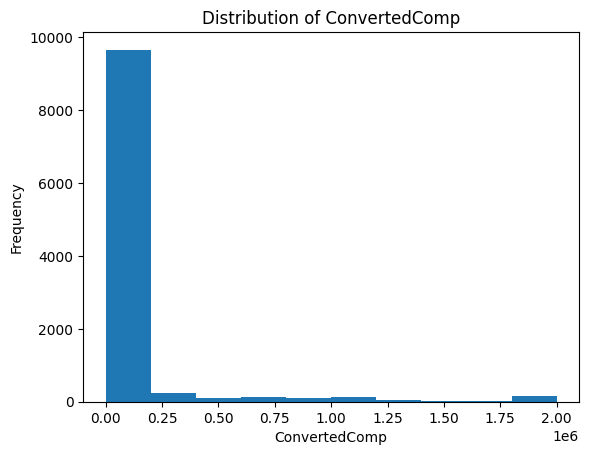

In [40]:
#Plot a histogram of ConvertedComp

import pandas as pd
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.hist(df['ConvertedComp'])
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


#Box Plots
Plot a box plot of Age

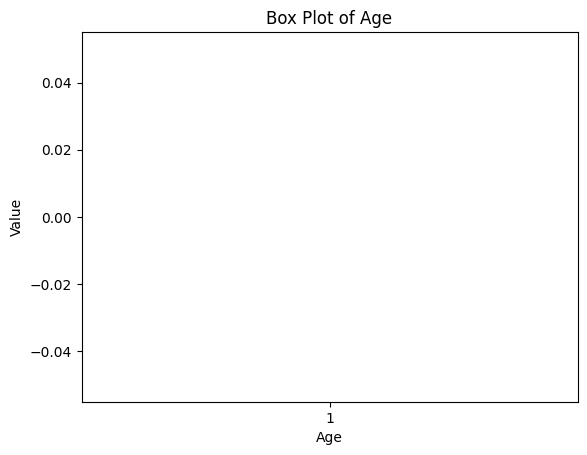

In [41]:
# Plot a box plot of Age

import pandas as pd
import matplotlib.pyplot as plt
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()


#Visualizing relationships in data
Scatter Plots

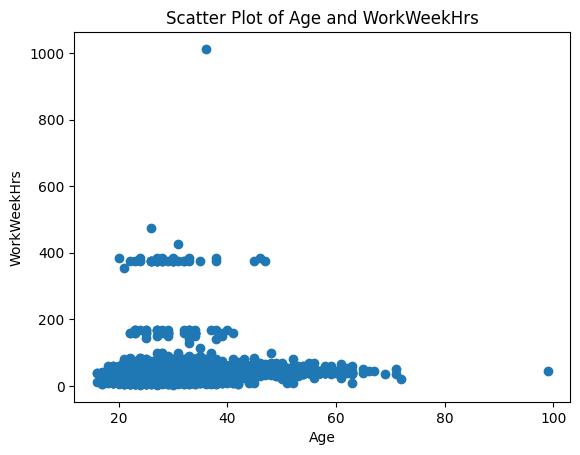

In [42]:
# Create a scatter plot of Age and WorkWeekHrs.

QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.scatter(df['Age'],df['WorkWeekHrs'])
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()


#Bubble Plots
Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size

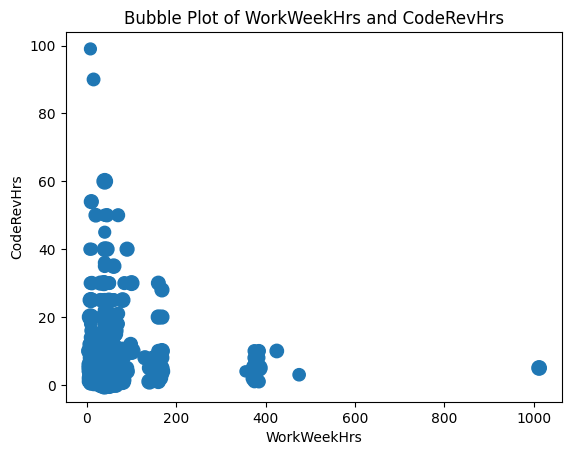

In [43]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size

QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'], s = df['Age']*3)
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()

#Visualizing comparison of data
Line Chart

Plot the median ConvertedComp for all ages from 45 to 60.

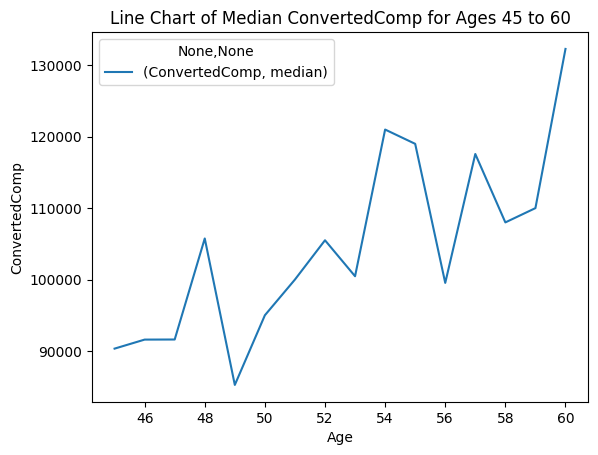

In [51]:
# Visualizing comparison of data
# Line Chart
# Plot the median ConvertedComp for all ages from 45 to 60.

import pandas as pd
import matplotlib.pyplot as plt
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY,conn)

df1 = df.groupby('Age').agg(['median'])

df1.plot(kind='line')
plt.title('Line Chart of Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.show()


#Bar Char
Create a horizontal bar chart using column MainBranch

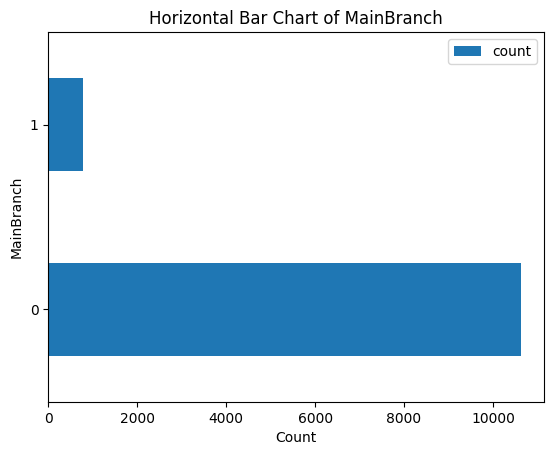

In [52]:
# Create a horizontal bar chart using column MainBranch

import pandas as pd
import matplotlib.pyplot as plt
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
group by MainBranch
order by count desc
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind='barh')
plt.title('Horizontal Bar Chart of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()


In [53]:
#Close the database connection.

conn.close()